In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os

In [2]:
from util import RESOURCE_DIR
type_characterization = ['database.xlsx', 'implementation.xlsx']
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[0]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
len(df)
df.head()

,Projects,Domains,Virtuoso-NoSql,Memcached,Microsoft Azure Table Storage,Ignite-NoSql,MarkLogic,Ignite-Sql,FileMaker,Riak KV,...,MS Access,Virtuoso,SAP Adaptive Server,CouchDB,ClickHouse,Vertica,Teradata,PostGIS,Etcd,MySQL
0,Activiti,automation,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,airbyte,infrastructure management,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,airsonic,media,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,spring-cloud-alibaba,infrastructure management,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,nacos,infrastructure management,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
df.iloc[: , 2:].sum().sort_values(ascending=False)

MySQL                            89
H2                               64
PostgreSQL                       62
Redis                            54
Oracle                           50
Ehcache                          41
MariaDB                          35
MongoDB                          31
MS SQL Server                    30
SQLite                           26
Elasticsearch                    22
IBM DB2                          20
Hazelcast                        14
Google Cloud Datastore           14
DynamoDB                         13
HBase                            13
Cassandra                        13
Solr                             12
SAP Adaptive Server              12
Firebase Realtime                11
Hive                             11
Firebird                          9
Informix                          9
Google BigQuery                   8
ClickHouse                        7
PostGIS                           6
Memcached                         6
Snowflake                   

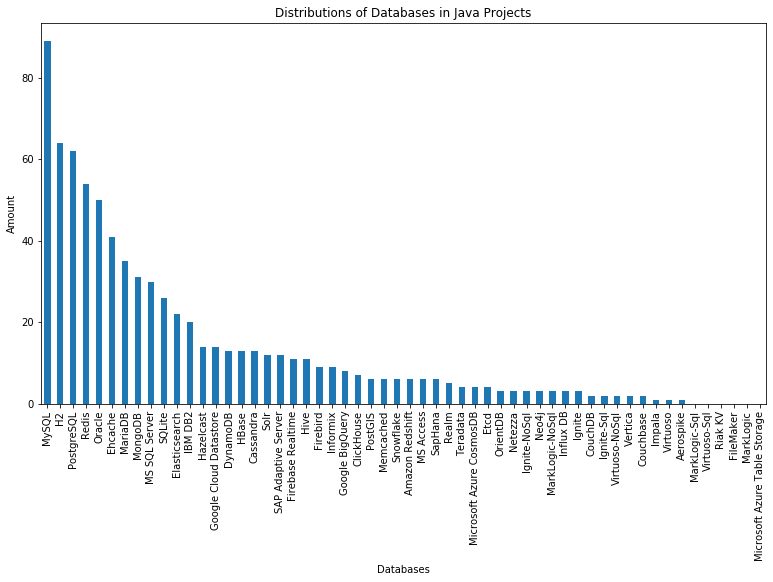

In [8]:
plt.figure(figsize=(13,7))
df.iloc[: , 2:].sum().sort_values(ascending=False).plot(kind='bar', title="Distributions of Databases in Java Projects")
plt.xlabel("Databases")
plt.ylabel("Amount")
plt.show() 

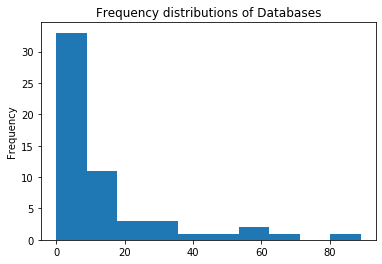

In [5]:
df.iloc[: , 2:].sum().plot(kind='hist', title="Frequency distributions of Databases")

In [6]:
df.Domains.value_counts()

software development         75
media                        44
infrastructure management    40
network                      18
game                         18
security                     18
monitoring                   18
communication                16
program analysis             15
hpc                          15
machine learning             12
automation                    9
file management               7
application container         7
operating system              3
collaboration                 3
gestão pessoal                2
cryptocurrency                2
erp                           2
scm                           2
e-commerce                    1
cms                           1
Name: Domains, dtype: int64

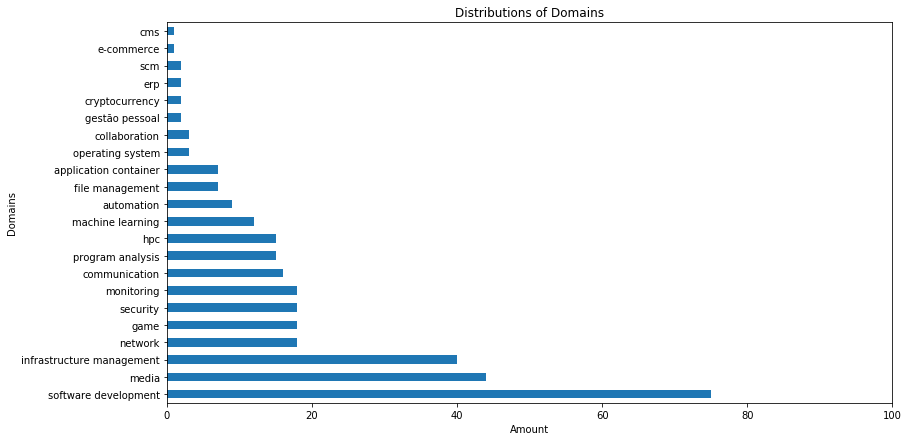

In [7]:
plt.figure(figsize=(13,7))
df.Domains.value_counts().plot(kind='barh', title = 'Distributions of Domains')
plt.xlim(0,100)
plt.xlabel("Amount")
plt.ylabel("Domains")
plt.show() 

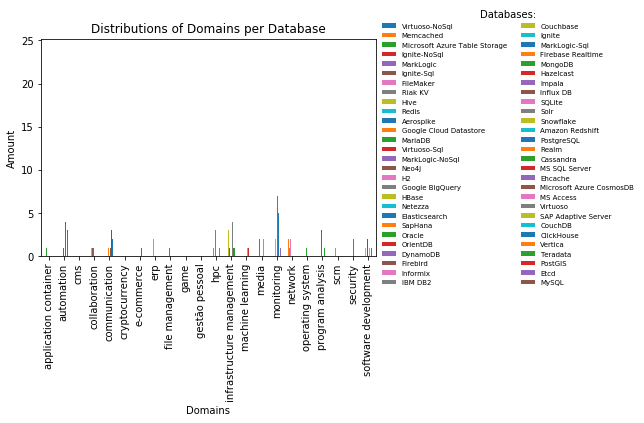

In [25]:
df.groupby(df.Domains).sum().plot(kind='bar')
plt.legend(title = "Databases:", frameon=False, ncol=2, prop={'size': 7}, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Distributions of Domains per Database")
plt.ylabel("Amount")
plt.show() 

In [26]:
df.loc[:,'SumPerProject'] = df.sum(axis=1)
df.head()

,Projects,Domains,Virtuoso-NoSql,Memcached,Microsoft Azure Table Storage,Ignite-NoSql,MarkLogic,Ignite-Sql,FileMaker,Riak KV,...,Virtuoso,SAP Adaptive Server,CouchDB,ClickHouse,Vertica,Teradata,PostGIS,Etcd,MySQL,SumPerProject
0,Activiti,automation,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,airbyte,infrastructure management,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,10
2,airsonic,media,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
3,spring-cloud-alibaba,infrastructure management,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,nacos,infrastructure management,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


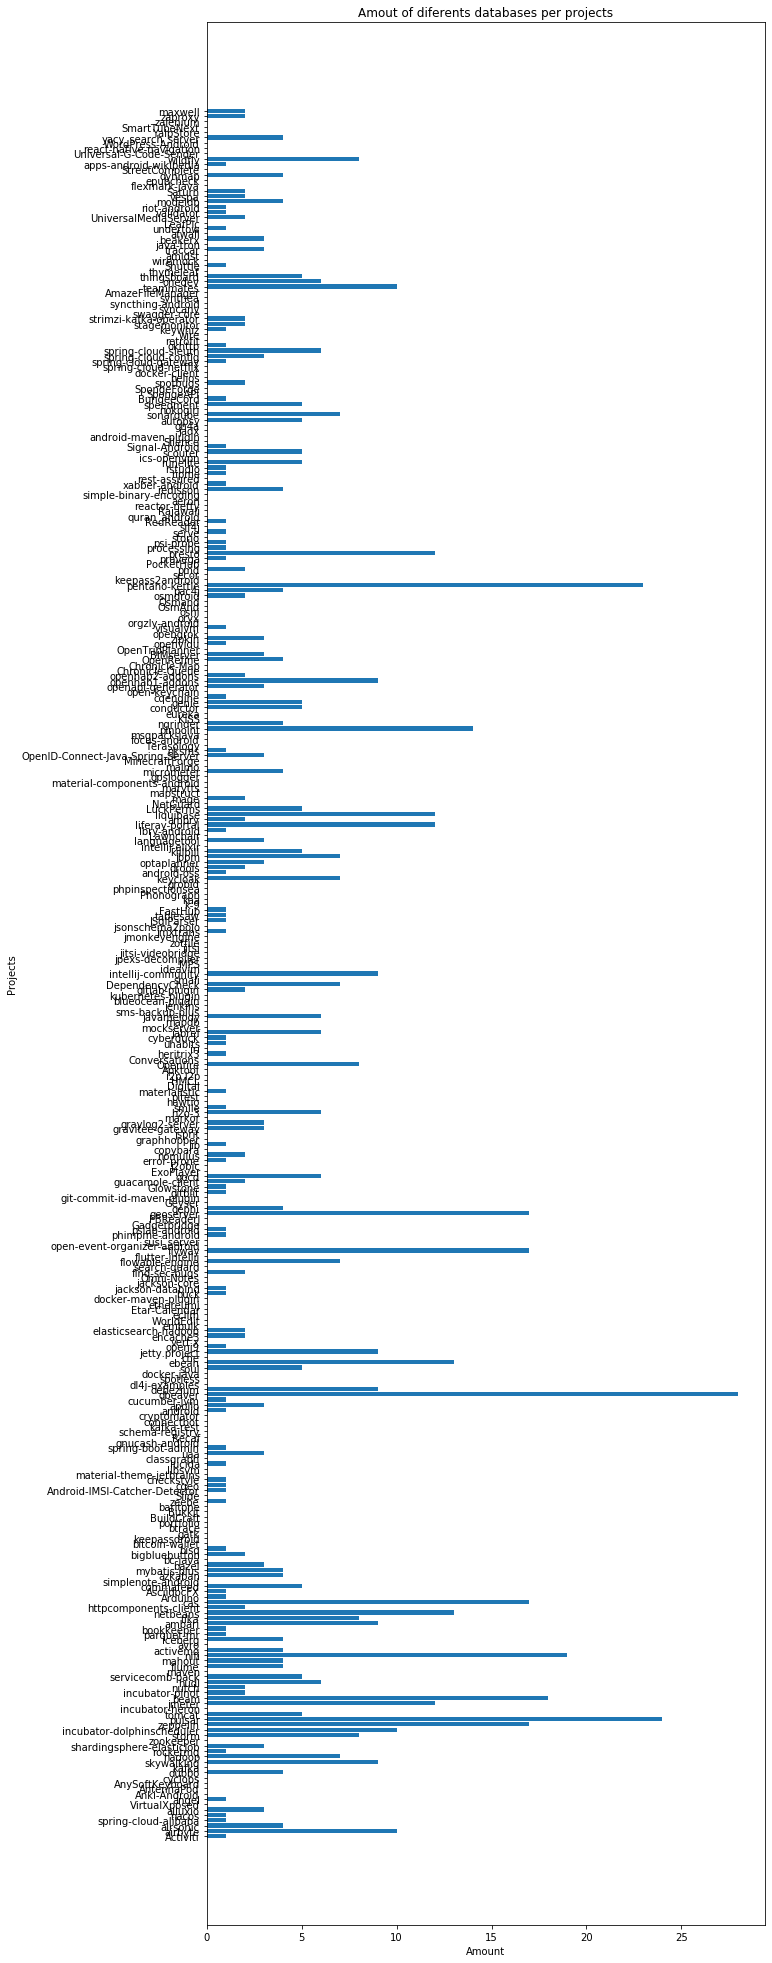

In [27]:
plt.figure(figsize=(10,35))
plt.barh(df.Projects, df.SumPerProject)
plt.title("Amout of diferents databases per projects")
plt.xlabel("Amount")
plt.ylabel("Projects")
plt.show()